In [10]:
import os
import struct
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten


def read_idx(filename):
    with open(filename, 'rb') as f:
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        return np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
        
def load_data(path_imgs, path_labels):

    X = read_idx(path_imgs)/255 
    y = read_idx(path_labels)  
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, y_train, X_test, y_test

ModuleNotFoundError: No module named 'tensorflow'

## 1. Data loading

Dataset shape: 48000 [n_images,hight,width]


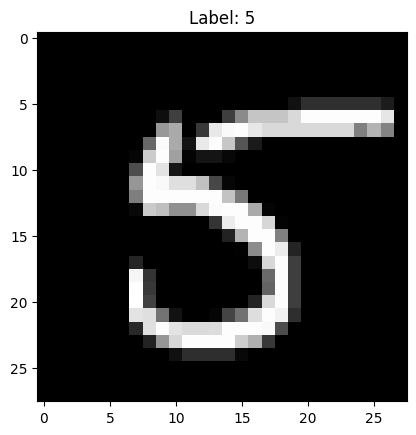

In [9]:
imgs = '/Users/tomaster/Documents/GitHub/ds_projects/neural-network/examples/MNIST-imageClassifier/datas/train-images-idx3-ubyte'
labels = '/Users/tomaster/Documents/GitHub/ds_projects/neural-network/examples/MNIST-imageClassifier/datas/train-labels-idx1-ubyte'

X_train, y_train, X_test, y_test = load_data(imgs, labels)

print('Dataset shape:', X_train.shape[0], "[n_images,hight,width]")
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

## 2. Multilayer neural network function